# 1 Data：探索性数据分析（EDA）

## 1.1 Which features are most likely to be predictive of each target class?

### (1) 方法一：类别均值差（记得改成循环两两比较的方式）

In [1]:
# 探索哪些特征对预测目标分类最相关
import pandas
# Now after we read this csv to dataframe, we can do some Feature Engineering on it
X_train=pandas.read_csv('./Data/X_train.csv')
print(X_train)


             0         1        2         3        4        5         6  \
0     0.617940 -0.391980  0.13278  0.032551  0.55201  0.83393 -0.837550   
1     0.333860 -1.549100  1.67050  0.793560  0.80251 -0.07206 -0.068276   
2     0.040399 -0.608070  1.62080 -0.355970  0.12105  1.35250  0.373200   
3     1.723600  0.195290  1.03880 -3.009100 -0.33222  0.91067  0.666690   
4    -1.032300  1.900100 -1.46010  0.383710 -0.51039  0.74481 -0.914660   
...        ...       ...      ...       ...      ...      ...       ...   
9995  0.821000 -0.016804  0.36978 -1.652500  1.32370 -0.67655 -1.238000   
9996 -0.636390 -0.403470  0.81521 -0.665990 -2.16210  2.03190  0.278910   
9997  0.773410  0.157330 -0.82969 -2.569100  1.33060 -0.45354  0.154800   
9998 -0.382970  1.011900 -2.12320  1.385600  0.30195 -0.45940 -0.050270   
9999 -1.294500  0.530550 -0.36347 -0.290030 -0.54796  0.34670  0.884470   

             7        8         9  ...      290      291       292       293  \
0    -0.874060  0.4

In [2]:
y_train=pandas.read_csv('./Data/y_train.csv')
print(y_train)

      label
0        10
1         5
2         5
3         5
4         5
...     ...
9995     19
9996      5
9997     17
9998     24
9999      5

[10000 rows x 1 columns]


In [3]:
# 先检查X_train和y_train中是否有缺失值
print(X_train.isnull().sum().sum())
print(y_train.isnull().sum().sum())

0
0


In [4]:
# # 查看y_train中类别的分布，发现类别分布很不平衡
# import matplotlib.pyplot as plt
# 
# y_train.value_counts().sort_index().plot(kind='bar', figsize=(12,6))
# plt.title("Classes in y_train")
# plt.xlabel("Classes")
# plt.ylabel("Number")
# plt.show()


In [5]:
# 发现训练集没有缺失值，因此我们不需要对训练集进行缺失值处理
# 所以我们接下来查看测试集的对应情况
X_test_1_df=pandas.read_csv('./Data/X_test_1.csv')
print(X_test_1_df)

           0        1        2        3         4        5         6        7  \
0   -0.19151  0.62207 -0.45063 -0.18845 -0.027468  0.24321  0.278860 -0.73817   
1    1.06350 -0.52336  1.50430 -1.74960  0.309440 -0.36961 -0.275510 -1.68080   
2    1.46090  0.22162  0.21577 -1.04270 -0.871700  0.11888 -1.004000 -1.10650   
3   -0.31224 -0.93880  0.87688  0.55749  1.627400  0.67578  0.547930  0.24193   
4   -0.36907 -1.00340 -0.57253  0.27028  1.480400 -0.14666  0.312390  1.02300   
..       ...      ...      ...      ...       ...      ...       ...      ...   
995 -0.90263 -0.59085 -2.15650  0.56399 -1.175200 -1.88700 -0.139830 -1.51110   
996  0.22081 -0.42464  0.58014  1.19630  0.388270  0.38796  0.179350  0.36487   
997 -0.61220  0.60428 -0.89467  0.12462  0.875430 -0.21853 -0.056064 -0.77791   
998  1.71650 -0.73341  0.89527  0.14132  1.170900  0.98503  0.062402  1.45810   
999 -0.40630  0.18932 -0.45013  2.30230  0.224620  0.26533  0.483430 -0.90335   

            8        9  ...

In [6]:
X_test_2_df=pandas.read_csv('./Data/X_test_2.csv')
print(X_test_2_df)

             0         1         2        3         4         5        6  \
0     0.031615 -0.758770  0.086539 -1.37000 -1.100000  0.084425 -0.82122   
1     1.423100 -0.287910 -0.235390  0.15389 -0.327750 -2.248200 -1.84450   
2     0.773970 -0.861780  0.977840 -0.88173 -0.007886  0.379990  0.15835   
3    -0.043148 -0.954310  0.436990 -0.91253 -0.292690 -0.976660 -0.24258   
4     0.357880  0.770610  0.210070  0.64266 -1.430400  1.414500  0.63321   
...        ...       ...       ...      ...       ...       ...      ...   
2015  0.116990 -2.750800 -1.504200 -0.43444 -2.000000  0.274390  0.36430   
2016 -0.336450  0.940870  0.030647  0.70629 -0.390210 -0.267180  0.16859   
2017 -0.491710  0.080699 -0.297230  0.65266  0.212730 -0.088889 -0.55004   
2018 -0.783190 -0.029347  0.637710 -1.19280 -2.280400  0.455550 -1.05580   
2019 -0.210810 -0.512330 -1.298900 -0.92224  0.301450  0.088977 -0.31537   

            7         8         9  ...      290      291       292       293  \
0     0

In [7]:
y_test_2_reduced_df=pandas.read_csv('./Data/y_test_2_reduced.csv')
print(y_test_2_reduced_df)

     label
0       12
1       25
2        9
3       27
4       14
..     ...
197     12
198      8
199     27
200     18
201     21

[202 rows x 1 columns]


In [8]:
# 查看所有测试集的缺失值情况
print(X_test_1_df.isnull().sum().sum())
print(X_test_2_df.isnull().sum().sum())
print(y_test_2_reduced_df.isnull().sum().sum())

0
0
0


In [9]:
# 都没有缺失值，所以不需要缺失值处理，接下来直接统计训练集中每个特征在每个类的平均值
# 合并两个df方便我们统计某个特征在某个特定类别的平均值
# Learned from: https://pandas.pydata.org/docs/reference/api/pandas.concat.html
# we can use pandas.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=None)
Xy_train_df = pandas.concat([X_train, y_train], axis=1)
print(Xy_train_df)

             0         1        2         3        4        5         6  \
0     0.617940 -0.391980  0.13278  0.032551  0.55201  0.83393 -0.837550   
1     0.333860 -1.549100  1.67050  0.793560  0.80251 -0.07206 -0.068276   
2     0.040399 -0.608070  1.62080 -0.355970  0.12105  1.35250  0.373200   
3     1.723600  0.195290  1.03880 -3.009100 -0.33222  0.91067  0.666690   
4    -1.032300  1.900100 -1.46010  0.383710 -0.51039  0.74481 -0.914660   
...        ...       ...      ...       ...      ...      ...       ...   
9995  0.821000 -0.016804  0.36978 -1.652500  1.32370 -0.67655 -1.238000   
9996 -0.636390 -0.403470  0.81521 -0.665990 -2.16210  2.03190  0.278910   
9997  0.773410  0.157330 -0.82969 -2.569100  1.33060 -0.45354  0.154800   
9998 -0.382970  1.011900 -2.12320  1.385600  0.30195 -0.45940 -0.050270   
9999 -1.294500  0.530550 -0.36347 -0.290030 -0.54796  0.34670  0.884470   

             7        8         9  ...      291       292       293      294  \
0    -0.874060  0.4

In [10]:
# 获取每一个类别中每一个特征的均值
# Learned from: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# we can use DataFrame.groupby(by=None, axis=<no_default>, level=None, as_index=True, sort=True, group_keys=True, observed=<no_default>, dropna=True)
class_feature_mean = Xy_train_df.groupby("label").mean()
print(class_feature_mean)

              0         1         2         3         4         5         6  \
label                                                                         
0      0.171874 -0.231679 -0.597359  0.154538 -0.149372 -0.281259  0.089827   
1     -0.242166 -0.259857 -0.614470  0.073504 -1.073394 -0.567201  0.517884   
2      0.334326  0.141505  0.214550 -0.556380 -0.303524 -1.031176 -0.952907   
3      0.062368  0.065469 -0.513220 -0.386684 -0.685145 -0.672393 -0.500190   
4      0.814809  0.320430  0.133637 -0.076740 -0.025460 -0.686977 -0.710856   
5     -0.204478 -0.072464  0.082618  0.231782 -0.018741  0.547536  0.274247   
6      0.257170  0.356158  0.419414 -0.136685  1.045990  0.192733  0.827010   
7      0.414917  0.316911 -0.366630  0.654675  0.390993 -0.807176 -0.140911   
8      0.206860 -0.148236 -0.546580 -0.206484  0.194218 -0.296017 -0.030805   
9      0.148534  0.455216  0.388618  0.046454  1.020604 -0.004023  0.563531   
10     0.159957  0.187495  0.074766  0.106139  0.174

In [11]:
print(type(class_feature_mean))

<class 'pandas.core.frame.DataFrame'>


In [12]:
# # 这里也可以做循环遍历每个特征中的两两类别之间均值之差，然后平均，然后再排序
# featureMean_diff = class_feature_mean.max() - class_feature_mean.min()
# sorted_features = featureMean_diff.sort_values(ascending=False)
# # 前100个diff最大的特征（也就是最能区分分类差异的特征）
# print(sorted_features.head(100))  

In [13]:
# 记得需要修改
import pandas as pd
import numpy as np
from itertools import combinations
# 假设 class_feature_mean 是 shape = [类别数, 特征数]，列是特征名
feature_scores = {}
# 遍历每一个特征列
for feature in class_feature_mean.columns:
    class_means = class_feature_mean[feature]
    # 枚举两两类别组合，计算差值
    diffs = [
        abs(class_means[i] - class_means[j])
        for i, j in combinations(class_means.index, 2)
    ] 
    # 平均两两类别差值
    feature_scores[feature] = np.mean(diffs)
# 排序：差值大的排前面
sorted_features = pd.Series(feature_scores).sort_values(ascending=False)
# 选出前100个最具区分力的特征
top_100_features = sorted_features.head(100).index.tolist()
print("Top 100 features with largest average pairwise class mean difference:")
print(top_100_features)


Top 100 features with largest average pairwise class mean difference:
['131', '85', '259', '279', '265', '79', '205', '270', '182', '240', '75', '107', '17', '90', '125', '6', '111', '157', '194', '215', '214', '55', '61', '46', '71', '87', '285', '228', '222', '4', '216', '208', '44', '25', '146', '154', '150', '86', '249', '181', '293', '33', '98', '218', '148', '47', '89', '242', '283', '239', '133', '64', '200', '59', '268', '171', '272', '43', '142', '88', '101', '274', '21', '247', '39', '14', '141', '250', '112', '23', '53', '196', '36', '284', '238', '76', '174', '189', '230', '49', '161', '204', '5', '99', '198', '255', '286', '120', '100', '234', '261', '132', '51', '162', '41', '147', '290', '123', '172', '45']


In [14]:
# 记得修改
# 提取这100个特征 + 标签列
Xy_train_mean = Xy_train_df[top_100_features + ['label']]


In [15]:
print(Xy_train_mean)

          131       85       259       279      265       79       205  \
0    -0.30522 -0.58216  1.175400  0.079735  0.47708  0.26310  0.427860   
1     0.53743  0.59878 -0.073228  0.794240 -0.54070 -1.07120 -1.393100   
2     0.72470  0.26816 -0.602960 -1.092200  0.26730 -0.23629 -0.212490   
3     0.22523 -1.86560  0.589300 -0.130320 -1.25120  0.44998 -0.019951   
4    -0.64958 -0.53611 -0.489020  0.399980 -0.85325  0.97977  0.950670   
...       ...      ...       ...       ...      ...      ...       ...   
9995  0.55156 -0.40541 -1.351100  0.083661 -1.17230  1.55470 -0.181630   
9996  0.19986  0.58937 -0.246390  0.769270  0.91909  1.34740 -0.068106   
9997  1.25020  0.75554 -1.567100  0.258750 -0.51515 -0.41782 -1.125000   
9998 -0.19812 -0.52291  2.586500  1.677400  0.41174 -1.44650  1.667800   
9999 -0.36743 -1.21640 -0.006006  1.109900 -0.77531  0.72763 -0.536570   

          270      182       240  ...      132        51      162       41  \
0     0.69673 -0.83492 -0.053453 

## 1.2 How does the class imbalance affect the learning process, and what methods can mitigate this issue?（记得补充几个准确率，recall，precision的公式）

（1）class imbalance affect the learning process：由于训练集中大多数标签集中在某一类，模型的学习过程更倾向于去预测大多数标签集中的类别，虽然在现实中很多情况与此类似（比如机器的好坏，普通人是否生病等），但是在某些情况下，预测错误可能产生严重后果。并且对于类别分布不平衡的样本，这时的准确率会非常虚高（因为某一类别样本非常多，模型预测这个类别的成功率也非常高），而对于样本较少类别的预测则会非常不准确（也就是会影响少样本类别的recall和precision）。
（2）mitigate this issue：a.采样方式：对多样本类别少采样，少样本类别重复采样（SMOTE）; b.设计权重lossfunction；c.Ensemble

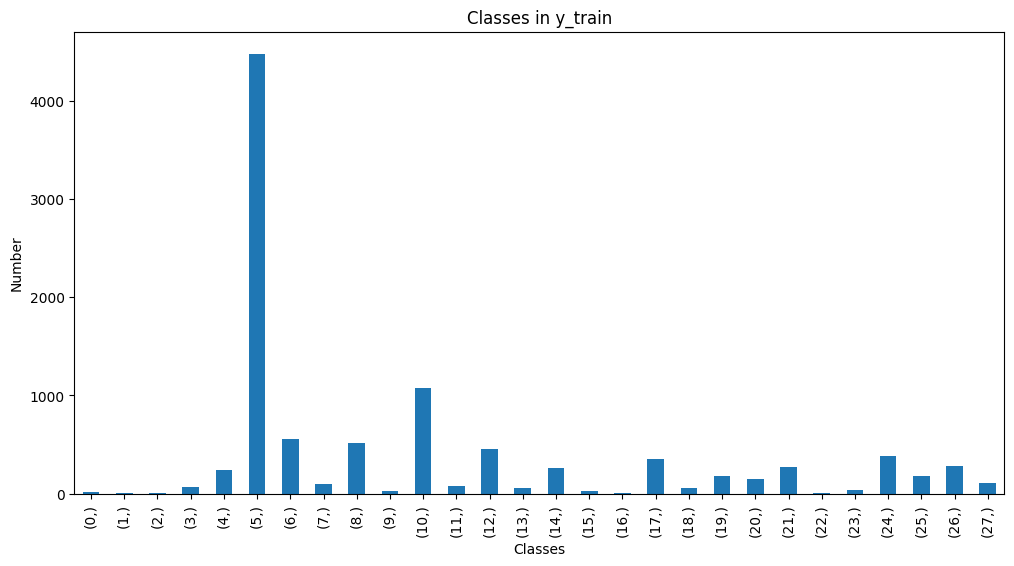

In [17]:
# 查看y_train中类别的分布，发现类别分布很不平衡
import matplotlib.pyplot as plt

y_train.value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Classes in y_train")
plt.xlabel("Classes")
plt.ylabel("Number")
plt.show()

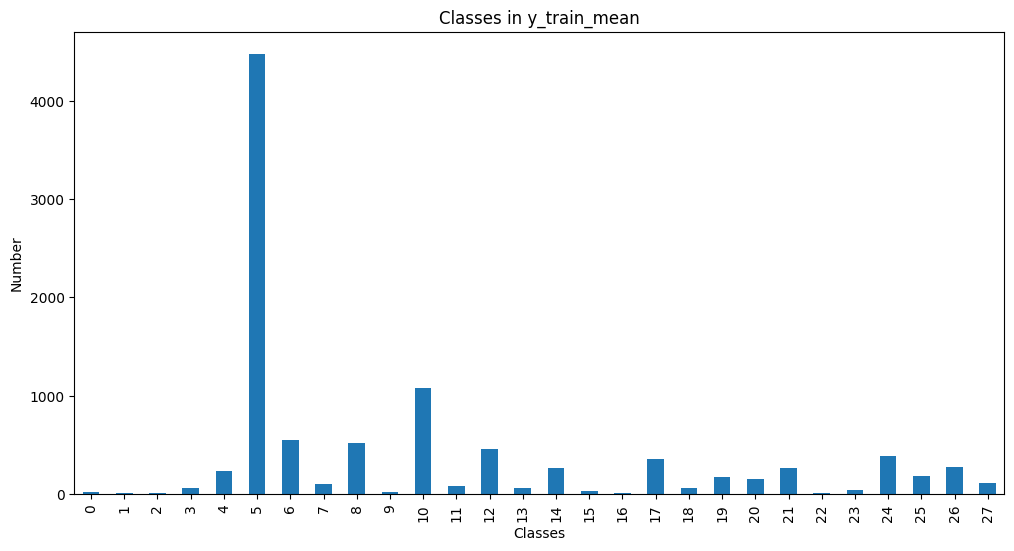

In [18]:
# 如果我们采用了mean的特征选择方法，还要查看y_train_mean
# 查看y_train中类别的分布，发现类别分布很不平衡
import matplotlib.pyplot as plt
y_train_mean=Xy_train_mean['label']

X_train_mean=Xy_train_mean[top_100_features]

y_train_mean.value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Classes in y_train_mean")
plt.xlabel("Classes")
plt.ylabel("Number")
plt.show()

### 1.2.1 resemble方式：对多样本类别少采样，少样本类别重复采样（SMOTE）:记得需要讲清楚SMOTE原理

In [19]:
from sklearn.model_selection import train_test_split
X_subtrain, X_val, y_subtrain, y_val = train_test_split(
        X_train_mean, y_train_mean, test_size=0.2, stratify=y_train_mean, random_state=42
    )

In [20]:
print(X_subtrain)

           131        85       259       279       265       79      205  \
7595 -0.119740  0.110710 -0.586920  0.450930  0.206270  0.50526  1.46620   
4838  0.498180  3.080300  1.091200 -2.306500  0.480550 -1.07210 -1.10760   
7492  0.601090 -0.959210 -1.503600  0.001567  0.885600  0.58436 -0.70710   
2417 -0.810860 -1.619900  0.124270  1.666400 -0.088853 -1.77290 -0.95966   
2547  0.080780 -0.780440  0.209380  0.230360  0.033061 -0.47610  0.30027   
...        ...       ...       ...       ...       ...      ...      ...   
9384 -0.047461  0.305870  0.524970 -0.739250  0.877160 -0.12618  1.29550   
3573 -0.286120  0.010386 -0.027873  0.868230 -0.440380  0.77407 -0.15198   
1865  0.736990 -0.421320 -1.090800 -0.942380  3.408100 -1.74950  1.84030   
3838 -0.163150  0.878250 -0.216540  0.705790  0.456970 -2.42340  1.58610   
5193 -2.341400 -1.378400  0.064253  0.746720  0.157370 -1.29720  0.66058   

          270       182      240  ...      261       132       51      162  \
7595  0.6

In [21]:
print(y_subtrain)

7595    12
4838     4
7492     5
2417    20
2547     5
        ..
9384    24
3573     5
1865    12
3838    12
5193     5
Name: label, Length: 8000, dtype: int64


In [22]:
# 先检测每个类别的样本数目
print(y_subtrain.value_counts())

label
5     3583
10     865
6      442
8      413
12     366
24     308
17     283
26     222
21     215
14     211
4      190
25     147
19     142
20     122
27      86
7       82
11      62
3       52
13      50
18      48
23      33
15      21
9       20
0       14
1        6
22       6
2        6
16       5
Name: count, dtype: int64


In [23]:
# Learned from: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
from imblearn.over_sampling import SMOTE
# 因为类别16只有5个，所以k_neighbors要小于5
sm = SMOTE(random_state=42,k_neighbors=3)
X_smote, y_smote=sm.fit_resample(X_subtrain, y_subtrain)


In [24]:
print(X_smote)

             131        85       259       279       265        79       205  \
0      -0.119740  0.110710 -0.586920  0.450930  0.206270  0.505260  1.466200   
1       0.498180  3.080300  1.091200 -2.306500  0.480550 -1.072100 -1.107600   
2       0.601090 -0.959210 -1.503600  0.001567  0.885600  0.584360 -0.707100   
3      -0.810860 -1.619900  0.124270  1.666400 -0.088853 -1.772900 -0.959660   
4       0.080780 -0.780440  0.209380  0.230360  0.033061 -0.476100  0.300270   
...          ...       ...       ...       ...       ...       ...       ...   
100319  0.490263  0.674604 -0.870665 -0.045897 -0.658621  0.527598  0.012715   
100320  0.705554  0.292281 -0.401279  0.520018 -0.362955  0.908638 -0.378521   
100321  0.480428 -0.722965  0.296709 -1.179388 -0.046479  1.326158 -0.562283   
100322  0.679879  1.072314 -1.265758 -0.996729 -0.798955  0.397986 -0.818620   
100323  0.407804  0.635778 -0.857567  0.101737 -0.110045  1.002066 -0.555113   

             270       182       240  .

In [25]:
print(y_smote.value_counts())

label
12    3583
4     3583
2     3583
11    3583
1     3583
13    3583
0     3583
26    3583
16    3583
6     3583
7     3583
9     3583
27    3583
17    3583
3     3583
19    3583
14    3583
18    3583
25    3583
21    3583
10    3583
24    3583
23    3583
8     3583
22    3583
20    3583
5     3583
15    3583
Name: count, dtype: int64


### 1.2.2  构建模型(记得补充解释为什么使用这种超参数，并且做对比实验（比如改max_iter）使用哪一个超参数效果最好)

#### （1）LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1000,
    random_state=42,
    class_weight='balanced'
)

In [27]:
# training
model_LR.fit(X_smote,y_smote)

/opt/anaconda3/envs/COMP9417/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [28]:
print(type(X_smote))
print(type(y_smote))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## 1.3 What are the appropriate evaluation metrics for this task, and why do accuracy-based metrics fail in imbalanced classification?

（1）因为对于类别不平衡的样本，模型能通过预测正确大量的多数样本所代表的类别，得到一个虚高的准确率，实际上在少数样本的类别的recall和precision上表现并不是很好。
（2）更合适的评估指标：计算多数和少数类别的recall和precision，以及F1-score（其实就是对recall和precision取均值），confusion matrix

#### （1）LogisticRegression-metrics

In [44]:
#### （1）LogisticRegression
y_val_pred_LR=model_LR.predict(X_val)

# to get log loss we need to use predict_proba
y_val_prob_LR = model_LR.predict_proba(X_val)


In [52]:
# 记得修改
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
print(classification_report(y_val, y_val_pred_LR, digits=4))
from sklearn.metrics import f1_score, log_loss

# F1 Macro
f1_macro_LR = f1_score(y_val, y_val_pred_LR, average='macro')
print(f"F1 Macro: {f1_macro_LR}")

# F1 Weighted
f1_weighted_LR = f1_score(y_val, y_val_pred_LR, average='weighted')
print(f"F1 Weighted: {f1_weighted_LR}")

# Log Loss
# 注意 log_loss 需要概率值（不是预测标签），通常是 predict_proba 的输出
# y_val_pred_proba_LR 应该是你的模型对 y_val 的 predict_proba 输出
LR_logloss = log_loss(y_val, y_val_prob_LR)
print(f"Log Loss(cross-entropy): {LR_logloss}")




              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         4
           1     0.0000    0.0000    0.0000         1
           2     0.0000    0.0000    0.0000         1
           3     0.1515    0.3846    0.2174        13
           4     0.5306    0.5417    0.5361        48
           5     0.9537    0.6440    0.7688       896
           6     0.8091    0.8018    0.8054       111
           7     0.4483    0.6190    0.5200        21
           8     0.7683    0.6117    0.6811       103
           9     0.0000    0.0000    0.0000         5
          10     0.8526    0.6157    0.7151       216
          11     0.3448    0.6250    0.4444        16
          12     0.5246    0.3516    0.4211        91
          13     0.0455    0.1667    0.0714        12
          14     0.1093    0.5094    0.1800        53
          15     0.6667    0.8000    0.7273         5
          16     0.2500    1.0000    0.4000         1
          17     0.5000    

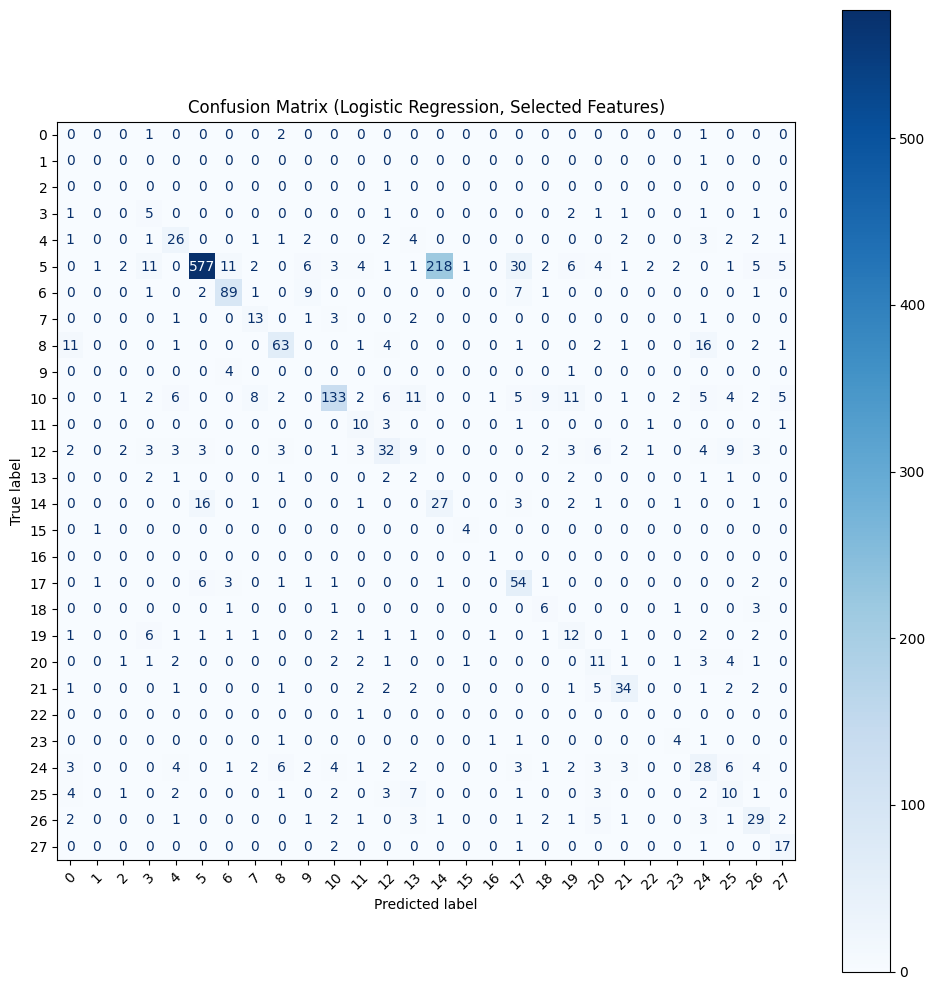

In [35]:
# 混淆矩阵绘制
cm = confusion_matrix(y_val, y_val_pred_LR, labels=range(28))
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, colorbar=True)
plt.title("Confusion Matrix (Logistic Regression, Selected Features)")
plt.tight_layout()

## 1.4 Transformer(记得修改)

## (1)Transformer模型定义简化版

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TabularTransformer(nn.Module):
    def __init__(self, input_dim=300, num_classes=28, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.embedding = nn.Linear(1, d_model)  # 每一维看作 token
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_dim * d_model, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):  # x: [batch_size, input_dim]
        x = x.unsqueeze(-1)            # [B, 300, 1]
        x = self.embedding(x)          # [B, 300, d_model]
        x = self.transformer(x)        # [B, 300, d_model]
        logits = self.classifier(x)    # [B, num_classes]
        return logits


## (2) 数据准备（NumPy 转 PyTorch）

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
import torch

# 标签编码
le = LabelEncoder()
y_smote_encoded = le.fit_transform(y_smote)
y_val_encoded = le.transform(y_val)

# DataFrame to NumPy to Tensor
X_train_tensor = torch.tensor(X_smote.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_smote_encoded, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_encoded, dtype=torch.long)

# Dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


## (3)模型训练

In [ ]:
model = TabularTransformer()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):  # 可调
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


## (4) 预测与评估

In [ ]:
from sklearn.metrics import classification_report, f1_score, log_loss

model.eval()
with torch.no_grad():
    logits = model(X_val_tensor.to(device))
    probs = F.softmax(logits, dim=1).cpu().numpy()
    y_pred = probs.argmax(axis=1)

# 转回原始标签（可选）
y_pred_labels = le.inverse_transform(y_pred)
y_val_labels = le.inverse_transform(y_val_encoded)

# 评估
print(classification_report(y_val_labels, y_pred_labels, digits=4))

f1_macro = f1_score(y_val_labels, y_pred_labels, average='macro')
f1_weighted = f1_score(y_val_labels, y_pred_labels, average='weighted')
logloss = log_loss(y_val_labels, probs)

print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")
print(f"Log Loss (Cross-Entropy): {logloss:.4f}")


# 2 Research: 只需要写报告？提供处理不平衡多类分类任务的最新方法的总结。务必详细解释一些所使用的算法。最好选择一两个领域进行深入探索。报告应写得清晰易懂，并且有充分的参考文献。
Provide a summary of state-of-the-art methods for handling imbalanced multi-class classification
tasks. Be sure to rigorously explain some of the algorithms that are used. It is a good idea to pick one or two
areas to explore further. The report should be well-written and well-referenced.

# 3 Modeling